This notebook quickly generates the plots for our current paper. 

# Setup

## Imports 

In [29]:
# Standard
import sys
# Third party
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import proplot as plot
# Local                                                                        
sys.path.append('/Users/46h/Research/code/accphys') 
from tools import (
    envelope_analysis as ea,
    plotting as myplt,
    animation as myanim,
    utils)
from tools.plotting import set_labels

## Settings

In [118]:
plt_kws = dict(legend=False, xlabel='s / L')
plot.rc['figure.facecolor'] = 'white'
plot.rc['cycle'] = 'default'
plot.rc['style'] = None # `None` for default proplot style

cmap = plot.Colormap('viridis')
cmap_range = (0, 1)
dpi = 500

## Read Data

In [119]:
# latnames = [f.rstrip() for f in open('_output/data/latnames.txt', 'r')]
# perveances = np.load('_output/data/perveances.npy')

# tracked_env_params_dict = {} 
# transfer_mats_dict = {}
# stats_dict = {}
# positions_dict = {}

# for latname in latnames:
#     for mode in (1, 2):
#         key = latname + '_mode{}'.format(mode)
#         print('Loading', key, '...')

#         # Load the list of tracked envelope parameters and transfer matrices        
#         tracked_env_params_list = np.load('_output/data/tracked_env_params_list_{}_{}.npy'.format(latname, mode))
#         tranfer_mat_list = np.load('_output/data/transfer_mats_{}_{}.npy'.format(latname, mode))
#         positions = np.load('_output/data/positions_{}.npy'.format(latname))
        
#         # Compute the beam statistics for each set of envelope parameters in the list
#         stats_list = []
#         for i, tracked_env_params in enumerate(tracked_env_params_list):
#             stats = ea.Stats(mode)
#             stats.read_env(tracked_env_params)
#             beta_x = stats.twiss2D.loc[:, 'bx'].values
#             beta_y = stats.twiss2D.loc[:, 'by'].values
#             stats.twiss2D['mux'] = utils.get_phase_adv(beta_x, positions, units='deg')
#             stats.twiss2D['muy'] = utils.get_phase_adv(beta_y, positions, units='deg')
            
#             if latname.startswith('fodo_split') and perveances[i] == 0:
#                 stats.twiss4D['nu'] = 90.0
                
#             for df in stats.dfs():
#                 df['s'] = positions
#                 df['s/L'] = positions / positions[-1]
#             stats_list.append(stats)
            
#         stats_dict[key] = stats_list
#         tracked_env_params_dict[key] = tracked_env_params_list
#         transfer_mats_dict[key] = tranfer_mat_list
#         positions_dict[key] = positions
        
# print('Done.')

In [120]:
_cycler = myplt.colorcycle(cmap, len(perveances), cmap_range)

# Plot

## Phase space projections at lattice entrance

In [121]:
# for key, tracked_env_params_list in tracked_env_params_dict.items():
#     print('Plotting', key, '...')
#     axes = myplt.corner_env(tracked_env_params_list[:, 0, :], figsize=5, pad=0.25, lw=1, 
#                             cmap=cmap, cmap_range=cmap_range)
#     plt.savefig('_output/figures/corner_vs_sc_{}.png'.format(key), dpi=500, facecolor='white')
#     plt.close()
# # print('Done.')

## Twiss parameters within lattice

In [122]:
# for i, (key, stats_list) in enumerate(stats_dict.items()):
#     print('Plotting', key, '...')
    
#     fig, axes = plot.subplots(ncols=1, nrows=3, sharey=False, figsize=(2.5, 5), aligny=True)
#     axes.set_prop_cycle(_cycler)
#     for stats in stats_list:
#         stats.moments[['s/L','x_rms']].plot('s/L', ax=axes[0], **plt_kws)
#         stats.twiss2D['ex/ey'] = stats.twiss2D['ex'] / stats.twiss2D['ey']
#         stats.twiss4D[['s/L','u']].plot('s/L', ax=axes[1], **plt_kws)
#         stats.twiss4D[['s/L','nu']].plot('s/L', ax=axes[2], **plt_kws)
#     axes.set_prop_cycle(_cycler)
#     for stats in stats_list:
#         stats.moments[['s/L','y_rms']].plot('s/L', ax=axes[0], ls='--', zorder=0, lw=1, **plt_kws)

#     axes[2].format(yformatter='deg')
#     axes.format(grid=False)
#     set_labels(axes, ['Beam size [mm]', 'u', r'$\nu$'], 'ylabel')

#     plt.savefig('_output/figures/param_vs_sc{}.png'.format(key), dpi=dpi, facecolor='w')
#     plt.close()
# print('Done.')

## Combined plot 

Build specialized plot for the paper.

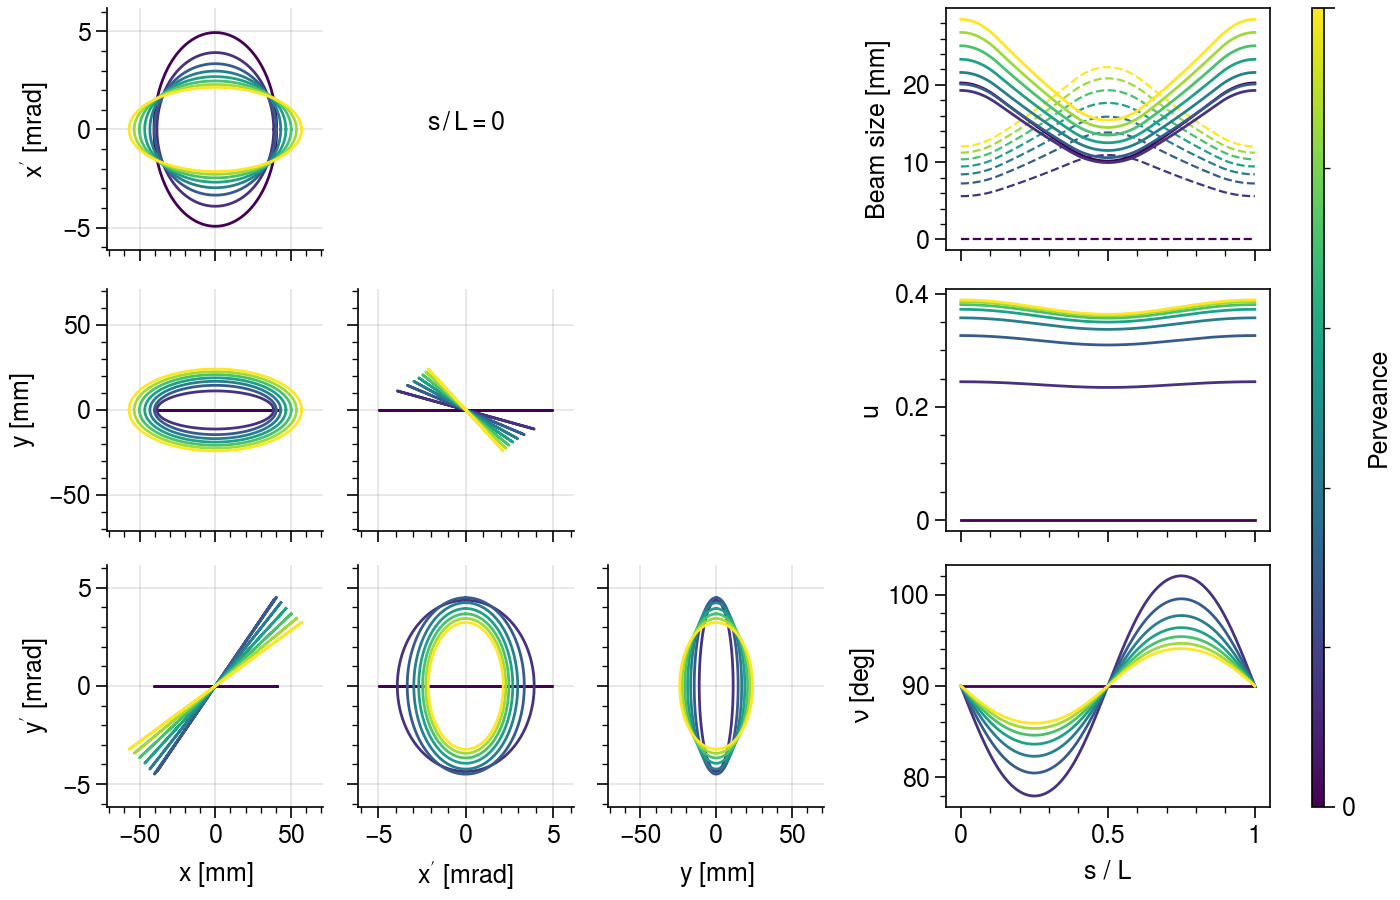

In [123]:
def plot_combined(key, text=r'$s \,/\, L = 0$', colorbar=True):
    """Plot 3 beam parameters as a function of s next to the transverse phase
    space projections."""

    # Create figure (constrained_layout > tight_layout)
    fig, axes = plt.subplots(3, 4, figsize=(7, 4.5), constrained_layout=True,
                             gridspec_kw=dict(width_ratios=[1, 1, 1, 1.5]))
    left, right = axes[:, :-1], axes[:, -1] 
    myplt.despine(left.flat)
    myplt.make_lower_triangular(left)

    # Share axes
    for col in axes.T:
        myplt.set_share_axes(col, sharex=True)
    for row in left:
        myplt.set_share_axes(row, sharey=True)

    # Set color cycle
    for ax in left.flat:
        ax.set_prop_cycle(_cycler)

    # Get ellipse boundary data
    params = tracked_env_params_dict[key][:, 0, :]
    if type(params) is not np.ndarray:
        params = np.array(params)
    if params.ndim == 1:
        params = params[np.newaxis, :]
    coords = ea.get_ellipse_coords(params)

    # Set up figure
    umax, upmax = 1.25 * myplt.get_u_up_max_global(coords)
    limits = 2 * [(-umax, umax), (-upmax, upmax)]
    labels = myplt.get_labels(units='mm-mrad')
    myplt.set_labels(left[-1, :], labels[:-1], 'xlabel')
    myplt.set_labels(left[:, 0], labels[1:], 'ylabel')
    myplt.set_labels(right, ['Beam size [mm]', 'u', r'$\nu$ [deg]'], 'ylabel')
    myplt.set_limits(left[:, 0], limits[1:], 'y')
    myplt.set_limits(left[-1, :], limits[:-1], 'x')

    # Plot envelope data
    for X in coords:
        X_horiz, X_vert = X[:, :-1], X[:, 1:]
        for i in range(3):
            for j in range(i + 1):
                left[i, j].plot(X_horiz[:, j], X_vert[:, i], lw=1, zorder=10)

    # Plot parameters as a function of s
    plt_kws.setdefault('lw', 1)
    stats_list = stats_dict[key]
    for ax in right:
        ax.set_prop_cycle(_cycler)
    for stats in stats_list:
        stats.moments[['s/L','x_rms']].plot('s/L', ax=right[0], **plt_kws)
        stats.twiss4D[['s/L','u']].plot('s/L', ax=right[1], **plt_kws)
        stats.twiss4D[['s/L','nu']].plot('s/L', ax=right[2], yunits='degrees', **plt_kws)
    right[0].set_prop_cycle(_cycler)
    for stats in stats_list:
        stats.moments[['s/L','y_rms']].plot('s/L', ax=right[0], ls='--', zorder=0, legend=False, lw=0.8)

    # Turn off grid for line plots
    for ax in right:
        ax.grid(False)
        
    axes[0, 1].annotate(text, xy=(0.5, 0.5), xycoords='axes fraction', horizontalalignment='center')
    
    if colorbar:
        norm = matplotlib.colors.Normalize(vmin=cmap_range[0], vmax=cmap_range[1])
        cbar = fig.colorbar(matplotlib.cm.ScalarMappable(norm, cmap), ax=axes[:, -1].ravel().tolist(), 
                            label='Perveance', aspect=100)
        cbar.set_ticks(cmap_range)
        cbar.set_ticklabels([r'$0$', ''])
        
    return axes

plot_combined('fodo_split_mode1');

In [124]:
for key in stats_dict.keys():
    print('Plotting', key, '...')
    axes = plot_combined(key, colorbar=True)
    plt.savefig('_output/figures/matched_vs_sc_{}.png'.format(key), dpi=500, facecolor='white')
    plt.close()
print('Done.')

Plotting fodo_mode1 ...
Plotting fodo_mode2 ...
Plotting fodo_split_mode1 ...
Plotting fodo_split_mode2 ...
Plotting fodo_skew_mode1 ...
Plotting fodo_skew_mode2 ...
Plotting fodo_sol_mode1 ...
Plotting fodo_sol_mode2 ...
Done.


## Effective transfer matrix 

### Eigenvalues

In [85]:
# nrows, ncols = 4, len(perveances)
# s = 20
# fontsize=8

# fig, axes = plot.subplots(nrows=nrows, ncols=ncols, figsize=(13, 6.5), hspace=0, wspace=0)
# myplt.set_labels(axes[0, :], ['Q = {:.2e}'.format(Q) for Q in perveances], 'title')

# # Plot unit circle in background
# psi = np.linspace(0, 2*np.pi, 50)
# x_circle, y_circle = np.cos(psi), np.sin(psi)
# for ax in axes:
#     ax.plot(x_circle, y_circle, 'k--', lw=1, zorder=0)
    
# # Plot eigenvalues
# keys = transfer_mats_dict.keys()
# keys_solution1 = [key for key in keys if key.endswith('1')]
# keys_solution2 = [key for key in keys if key.endswith('2')]


# for i, key in enumerate(keys_solution1):
#     transfer_mat_list = transfer_mats_dict[key]
#     for ax, M in zip(axes[i, :], transfer_mat_list):
#         eigvals, eigvecs = np.linalg.eig(M)
#         ax.scatter(eigvals.real, eigvals.imag,  s=s, c=('r', 'r', 'b', 'b'), zorder=1)
#         mu1, _, mu2, _ = np.degrees(np.arccos(eigvals.real))
#         split, fontsize = 0.05, 8
#         ax.annotate(r'$\mu_1 = {:.2f}\degree$'.format(mu1), xy=(0.5, 0.5+split), 
#                     xycoords='axes fraction', horizontalalignment='center', fontsize=fontsize)
#         ax.annotate(r'$\mu_2 = {:.2f}\degree$'.format(mu2), xy=(0.5, 0.5-split), 
#                     xycoords='axes fraction', horizontalalignment='center', fontsize=fontsize)
        
# # Formatting
# scale = 1.25
# axes.format(
#     suptitle='Perveance', grid=False,
#     xlim=(-scale, scale), ylim=(-scale, scale), xlabel='Real', ylabel='Imag',
#     xticks=[-1, 0, 1], yticks=[-1, 0, 1],
#     leftlabels=['FODO', 'FODO\n(split tunes)', 'FODO\n(skew quads)', 'FODO\n(solenoid insert)'], 
#     xminorlocator='null', yminorlocator='null'
# )
        
# plt.savefig('_output/figures/eigvals.png', dpi=dpi, facecolor='w')

### Eigenvectors 

In [86]:
# nrows, ncols = 4, 3
# s = 20
# fontsize = 7

# fig, axes = plot.subplots(nrows=4, ncols=3, figsize=(5.75, 6), hspace=0, wspace=0)
# myplt.set_labels(axes[0, :], ['Q = {:.2e}'.format(Q) for Q in perveances[:3]], 'title')

# # Plot unit circle in background
# psi = np.linspace(0, 2*np.pi, 50)
# x_circle, y_circle = np.cos(psi), np.sin(psi)
# for ax in axes:
#     ax.plot(x_circle, y_circle, 'k--', lw=1, zorder=0)
    
# # Plot eigenvalues
# keys = transfer_mats_dict.keys()
# keys_solution1 = [key for key in keys if key.endswith('1')]
# keys_solution2 = [key for key in keys if key.endswith('2')]

# for i, key in enumerate(keys_solution1):
#     transfer_mat_list = transfer_mats_dict[key]
#     for ax, M in zip(axes[i, :], transfer_mat_list[:3]):
#         eigvals, eigvecs = np.linalg.eig(M)
#         ax.scatter(eigvals.real, eigvals.imag,  s=s, c=('r', 'r', 'b', 'b'), zorder=1)
#         mu1, _, mu2, _ = np.degrees(np.arccos(eigvals.real))
#         split = 0.05
#         ax.annotate(r'$\mu_1 = {:.2f}\degree$'.format(mu1), xy=(0.5, 0.5+split), 
#                     xycoords='axes fraction', horizontalalignment='center', fontsize=fontsize)
#         ax.annotate(r'$\mu_2 = {:.2f}\degree$'.format(mu2), xy=(0.5, 0.5-split), 
#                     xycoords='axes fraction', horizontalalignment='center', fontsize=fontsize)
        
# # Formatting
# scale = 1.5
# axes.format(
#     grid=False,
#     xlim=(-scale, scale), ylim=(-scale, scale), xlabel='Real', ylabel='Imag',
#     xticks=[-1, 0, 1], yticks=[-1, 0, 1],
#     leftlabels=['FODO', 'FODO\n(split tunes)', 'FODO\n(skew quads)', 'FODO\n(solenoid insert)'], 
#     xminorlocator='null', yminorlocator='null'
# )
        
# plt.savefig('_output/figures/eigvals2.png', dpi=dpi, facecolor='w')